In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import tempfile, os, zipfile
from PIL import Image
import requests
from matplotlib import pyplot as plt
import squarify
import random

from os import listdir
from os.path import isfile, join


In [32]:
import requests
from urllib.parse import urlencode

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.com.am/d/1mFfgWQxggpeUQ'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)

download_url = response.json()['href']

download_response = requests.get(download_url)


file = tempfile.TemporaryFile()
file.write(download_response.content)
fzip = zipfile.ZipFile(file)
fzip.extractall('./TJ_data')

file.close()
fzip.close()

# https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification/download?datasetVersionNumber=3

In [38]:
listdir("./TJ_data") # Tom&Jerry_dataset
listdir("./TJ_data/Tom&Jerry_dataset") 

['archive.zip']

In [39]:
fzip = zipfile.ZipFile("./TJ_data/Tom&Jerry_dataset/archive.zip")
fzip.extractall('./TJ_data/dataset')

fzip.close()

In [105]:
# print(listdir("./TJ_data/dataset"))
# print(listdir("./TJ_data/dataset/tom_and_jerry"))
# print(listdir("./TJ_data/dataset/tom_and_jerry/tom_and_jerry"))

dataset_dir = "./TJ_data/dataset"
tom_dir = "./TJ_data/dataset/tom_and_jerry/tom_and_jerry/tom"
jerry_dir = "./TJ_data/dataset/tom_and_jerry/tom_and_jerry/jerry"
tj_0_dir = "./TJ_data/dataset/tom_and_jerry/tom_and_jerry/tom_jerry_0"
tj_1_dir = "./TJ_data/dataset/tom_and_jerry/tom_and_jerry/tom_jerry_1"

print(listdir(dataset_dir))
# listdir(tom_dir)
# listdir(jerry_dir)
# listdir(tj_0_dir)
# listdir(tj_1_dir)

['.DS_Store', 'ground_truth.csv', 'tom_and_jerry', 'challenges.csv']


In [61]:
RANDOM_STATE = 42

In [65]:
Cartoon_gt = pd.read_csv(
    dataset_dir + '/ground_truth.csv',
    sep=","
    )
Cartoon_ch = pd.read_csv(
    dataset_dir + '/challenges.csv',
    sep=","
    )

In [81]:
Cartoon_gt.sample(5)

,filename,tom,jerry
2062,frame2062.jpg,0,0
3032,frame3032.jpg,0,1
1715,frame1715.jpg,0,0
339,frame339.jpg,0,1
114,frame114.jpg,0,1


In [68]:
Cartoon_gt.shape

(5478, 3)

In [92]:
Cartoon_gt.describe()

,tom,jerry
count,5478.000000,5478.000000
mean,0.494706,0.368748
std,0.500018,0.482509
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [100]:
Cartoon_gt_df = pd.DataFrame(Cartoon_gt)
gt_gr = Cartoon_gt_df.groupby(['tom','jerry']).count()
gt_gr['percent'] = Cartoon_gt_df.groupby(['tom','jerry']).size() / len(Cartoon_gt_df) * 100
print(gt_gr)

           filename    percent
tom jerry                     
0   0          1528  27.893392
    1          1240  22.635999
1   0          1930  35.231836
    1           780  14.238773


In [67]:
Cartoon_ch.sample(5)

,folder,image_name
31,tom,frame4581.jpg
23,tom,frame2946.jpg
16,tom,frame1684.jpg
21,tom,frame2154.jpg
29,tom,frame4579.jpg


In [70]:
Cartoon_ch.shape

(32, 2)

In [93]:
Cartoon_ch.describe()

,folder,image_name
count,32,32
unique,2,32
top,tom,frame360.jpg
freq,18,1


In [120]:
jdir = listdir(tom_dir) + listdir(jerry_dir) + listdir(tj_0_dir) + listdir(tj_1_dir)
jdir_set = set(jdir)
gtl = list(Cartoon_gt['filename'])+ list(Cartoon_ch['image_name'])
gtl_set = set(gtl)
jdir_set.difference(gtl_set)

set()

(0.0, 100.0, 0.0, 100.0)

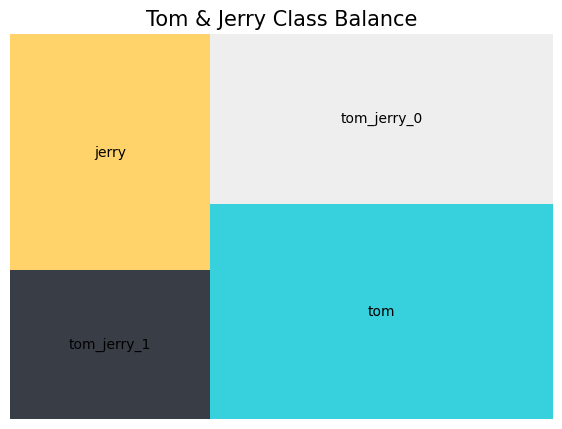

In [78]:
raw_images_dir = './TJ_data/dataset/tom_and_jerry/tom_and_jerry/'
class_names = ['tom_jerry_1', 'jerry', 'tom', 'tom_jerry_0']
image_counts = [len(os.listdir(os.path.join(raw_images_dir, class_name))) for class_name in class_names]
fig, ax = plt.subplots(figsize = (7, 5))
colors = ['#393E46', '#FFD369', '#36D1DC', '#EEEEEE']
squarify.plot(image_counts, label = class_names, ax = ax, color = colors, text_kwargs = {"fontsize": 10})
plt.title("Tom & Jerry Class Balance", fontsize = 15)
plt.axis("off")

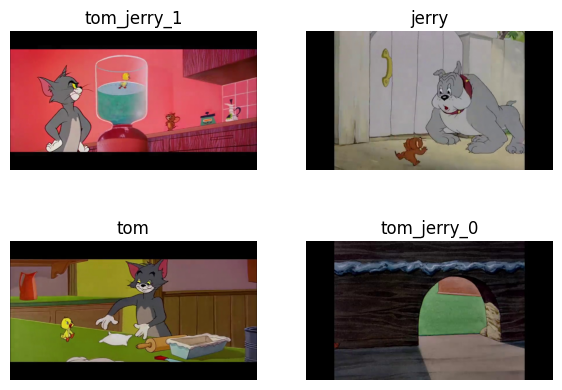

In [102]:
images = []
for class_name in class_names:
    image_files = os.listdir(os.path.join(raw_images_dir, class_name))
    image_file = random.choice(image_files)
    images.append(os.path.join(raw_images_dir, class_name, image_file))

fig, ax = plt.subplots(2, 2, figsize = (7, 5))

for i in range(4):
    ax[i // 2, i % 2].imshow(plt.imread(images[i]))
    ax[i // 2, i % 2].set(title = class_names[i])
    ax[i//2, i%2].axis('off')